# Fiche de télécommande du Petit Robot Bleu

In [1]:
import urllib
import pygame,os
import time
import matplotlib.pyplot as plt
#from matplotlib.pyplot import ion, plot, draw
from IPython import display
#import pylab as pl

from Joystick import *
from PortCom import *

%matplotlib inline

# I. Commande Joystick

#### Recherche du PortCom

###### En mode communication continu le findPort ne marche pas : Il faut donner les port et arret de la communication spontané du robot pour passer en mode par requette

In [2]:
ser=findPort(port=28)

Connected to 28 with 


#### Paramètres monitorés

In [3]:
monitor=monitoring(["V1R", "V1C"])
monitor.getValues(ser)

#### Pilotage

In [4]:
joystick_XBox = joystick_XBox_class( VtsMax=500.0, VtsDeadzone=0.07, VtsOffSet=0.0, VtsAcc=50.0, 
                                    RotMax=500.0, RotDeadzone=0.1, RotOffSet=0.0, RotAcc=30.0)
time_init=time.clock()
VtsD = 0
VtsA = 0

In [5]:
while joystick_XBox.bstate_int != 2:
    #time.sleep(0.01)
    monitor.getValues(ser)
    String = joystick_XBox.getVtsMString()
    ser.write(String)
ser.write("VtsM 0 0\n")

9L

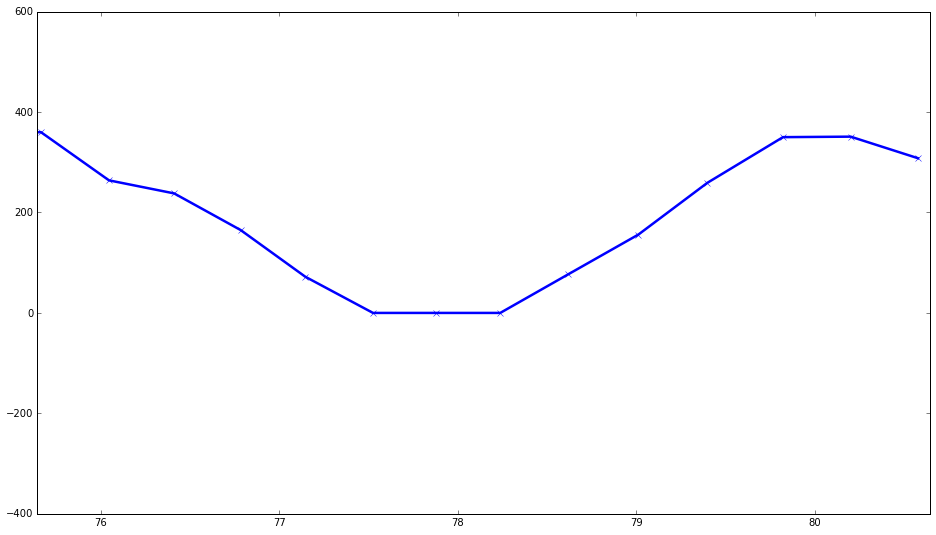

In [7]:
fig, axes = plt.subplots(figsize=(16,9))
monitor.plot(monitor.ListVar[0]+"tps", monitor.ListVar[0]+"val", marker='x', RangeX=5)
monitor.plot(monitor.ListVar[1]+"tps", monitor.ListVar[1]+"val", RangeX=5)
#display.clear_output(wait=True)
#display.display(plt.gcf())

In [7]:
monitor.datas

,V1Rtps,V1Rval,V1Ctps,V1Cval
0,0,0,5,0


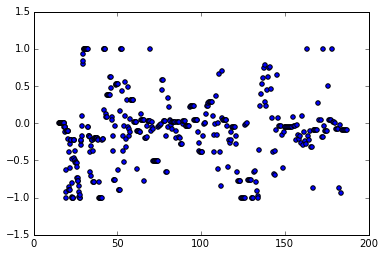

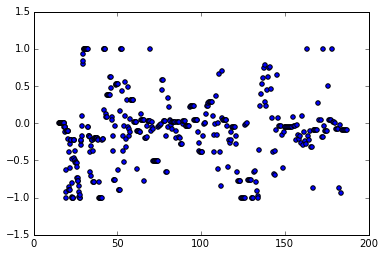

In [3]:
joystick_XBox = joystick_XBox_class( VtsMax=500.0, VtsDeadzone=0.07, VtsOffSet=0.0, VtsAcc=50.0, 
                                    RotMax=500.0, RotDeadzone =0.1, RotOffSet=0.0, RotAcc=30.0)
time_init=time.clock()
while joystick_XBox.bstate_int != 2:
    joystick_XBox.getState()
    plt.scatter(time.clock(),joystick_XBox.mon_joystick.get_axis(0))
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [ ]:
ev=pygame.event.get()
[RotRob,VtsRob] = joystick_XBox.getState()
print VtsRobdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVkAAAEGCAYAAADPKub5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAGPBJREFUeJzt3X+QnVV9x/H3d3dDSLLZkA31FxWVX1WCBFpq67QUpxGxOMoQ/mgoOmBrxbGYqckf6DA0dMBBJDCaqiOoEKKUOhUpTaW0KlAH1DIovxLDZBDQauiUEJLsJkCS3W//eM7NPnv33s3uvfc8Pz+vmWdm7zl77znn3ud+77nnnOdcc3dERCSOvrwrICJSZQqyIiIRKciKiESkICsiEpGCrIhIRAqyIiIRKciKiETUkyBrZpeZ2SNm9oqZ3dqUt9zMnjKzvWZ2n5kd25R/nZntCMdnm/LebGb3h/tuNbPlvaiviEhWetWT/Q1wNXBLOtHMjgbuBK4AFgOPAN9K5V8KnAecGo73h7SGO4CfAsPhMb4dHlNEpBR6EmTd/S53vxt4sSlrBbDZ3e909/3AVcAyMzsp5F8MrHP37e6+HVgHXAIQ/ud0YK27v+ru3wGeAC7oRZ1FRLLQ6zFZa7q9FHi8ccPd9wFPh3SAk9P5JEF0aeq+z7j73lT+46l8EZHC63WQbd4IYQGwpyltD7Aw/D0I7G7KG2yT13xfEZHCG+jx4zX3ZEeBoaa0RcBIm/xFIa3dfY9iatBOCjbTTjciEpW7N8e4w4rdk90CLGvcMLMFwPEhvZF/Wur/lwGbU3nHmdlgU/4WRERKoic9WTPrB+aEx+s3s7nAQeAu4HozWwHcA6wFHnP3beGuG4HVZnYPSS94NfAFAHffZmaPAWvN7ErgXOAUktUKbeWxdaOZqewalZ13+So7v7I70aue7JXAPuBy4IPAy8AV7r6DZDXAZ4CdwBnAysad3P0mYBPwJMmk1yZ3vzn1uCvDfXaGx7jA3ZtXMIiIFJZVZdPuxphsXT9hVXZ9ylfZuZad+5isiIikqCcrInIY6smKiBSUgqyISEQKsiIiESnIiohEpCArIhKRgqyISEQKsiIiESnIiohEpCArIhKRgqyISEQKsiIiESnIiohEpCArIhKRgqyISEQKsiIiESnIiohEpCArIhJRT36tVjqX7Lg+HG7tLMQvOxSxTiJlpSCboySYDQE3hpRVmFmuQa2IdRIpMwXZXA2TBLOLU2mrc6pLQxHrJFJeCrIiAmiYKBYF2VztBFalbq8C9uRUl4Yi1kli0zBRPPpJ8JwVsfdQxDpJXGZLmDxMdBuwGvcX86tUgXTzk+DqyeasiAGsiHUSKSsFWRFBw0TxaLhARAANE01HwwUi0jUF1TgUZDOm3oJIvSjIZqiIy2QU9EXiUpDNVLGupipi0BepGgXZWitW0BepIgXZTGmZjEjdaAlXxoo0BjoxXLA+pCRBv+jPoUjWulnCpSBbc0UK+iJFpXWy0jEFVZG49PMzIiIRKciKiESkICsiEpGCrIhIRJr4yomZpeb0NQElUlUKsjkws6aLWcn9ctZWQV8fBNWn1zg+BdkcFO1i1nZBv2gfBNJbeo2zoSArbYN+kT4IpPeK9mFfVQqyOdAOBiL1kclltWb2APAHwMGQ9Gt3f1vIWw58CXgj8N/AJe7+q9R9rwP+Ktz8mrt/qk0ZpbqstkhjYY2vjZN3MGi1q0F5nl85vHavu17jqQq/d4GZ3Q98w91vaUo/GniaJIhuAq4BznT3d4b8S4FPAn8a7vI9YL2739SijFIF2aLRxNf0qvpcVLVdvVaWvQtaVW4FsNnd7wQws6uAHWZ2krtvIxkuWufu20P+OuCjwJQgK91p9ebSGy5R5QmiKrSh6LK8GOFaM3vBzB40s7NC2lLg8cY/uPs+kp7t0pB0cjofeCKVJ5KJYZKv1BeHYz0T+5aVjZlhtiQcs+6USQey6sleDmwB9gMXApvM7DRgAfBC0//uARaGvweB3U15g9MV1Hzi6JNaJKGfG5q5Xn4AZRJk3f3h1M2NZnYhcC4wSvKqpy0CRsLfzfmLQppIZqqzGkSLtvKQ9xKuLaRecTNbABwf0hv5pwGPhNvLgM3TPaA+laXXGpOAjXCkGfjqa359u+nZRg+yZrYI+EPgv0iWcP05cCbwCWAXcL2ZrQDuAdYCj4VJL4CNwGozu4dk4mw18IXYdRZpVo2gWp0+eZlEX8IVlmndA7wVGAO2Ale6+w9C/nLgi8CbgJ/Qep3sR8LNr1ZlnaxIHvRzQ50p/DrZLCjIikgsZVknK9IzzT2y9IL6btL1IS29pk27pXQmL0X68KG/bqSxFOXDHaQnt7R2VHpNPVkpFTNjIf04b2SU1zHI7YcuFGi4jCcAZpU+yrpwS0uapLfUk5XSaFze+g+M8UW2MMT5wI68qyUyLfVkC0CbdMzM1KX0L/Mxdk5ZlDTKqeHv780i/Ta0pEli0OqCnGm7uZlbYjYpyN4GfIJ+RhjTxJdEpdUFJaYLHWeu1VL6EcYUGKXQFGSl0CYv1Up6+bq8VcpEwwU503BBexNLtSY/O3puJGsaLigxbT4yHQ2mSPkpyBaAgqpIdSnI1lQ5lo1p1ygpP43J1lCZxoG1a5QUgcZkZVbKNNKpoCplp8tqRUQiUk+2hjTSKZIdjcnWVIyJL42fSlVpTLbgijiT3+s66OemRVpTkI2sMZM/EXqoaPAp03SaSHYUZCNT6OlMEXv/ddPX18fi8Ly/ZMb4+HjONSonBVnpkd5Np9Wn919cfX19LHSfeA3c6evrU6DtgIJsZHWZyW/swZDeI6vToKjef/4WhwA76TXQh1xHFGQjq9MGMFVtl0g3FGQzUPbgk/XSrLr0/ovsJTNWpV7nVcCIfsm3I1onK9PKa0/XIk981WU9sCa+JmidrESUzwhpUQNXndYD1zmo9pKCrMisaFpOZkdBVg5DI6Qi3dCYrBxWXcYgZ0K/O1ZP3YzJKsiKzJI+dOpHE18iPTDTFQ2xgmqRV1RI5xRkRcj/Ut68y5d4FGRFyH/NQN7lSzz6+RkRkYjUkxUh/4VqeZcv8Wh1gUiQ98RT3uVLe1pdIIVTxoCRdx3zLl/iUJAtkKqsv9RMefX09/czPn4UAH19uxgbG8u5RuWhIFsQVdp4RDPl1ZIE2EEa5+b4+Cr6+/sVaGdIQbYwyhGayjgMEFMdno+kBzv53BwfL965WVQKsjJjMx0GqMtMuYZFZCYUZAuj+KFppn3tuvzkTuzvHkUZo+/r28X4+ORzs69vNJe6lJGCbEH08ocIi6DMdYf8A1yRxujHxsbCuGxybvb1jWo8dhYUZAuk6IGp+H3t3phpgIv7fBRrjF5BtXMKsgVU1MmU9DDAOLCHBcDcwta3czMLcHUZFmllYGCARSHw7u7v5+DBgznXqLgUZAum6JMpE8MajY2rn2SIGwpb39jS7TQzzJaEW90OMRT3e8PAwAALxsYmXvOxMQYGBhRo2yhFkDWzYeDrwNnADuDT7n5HvrWKo1hfEtuZqOUg72E9Ra/vbM0+wPV6DLXVGP0wsMQs928Li0KAnfSaazihrVIEWeBLwCvAa4DTge+a2ePu/vN8q5WNA/TXqneYt84mIZs/Hp9kIZ/vKig27tPu200RVh40JOfoEubMGWH//v251qVoCh9kzWwBsAJY6u77gIfM7G7gQ8Cnc60cycm+kH4ARmh8mg8Dr3IUewHYFcYuZ/JmmNqHmsMIH2CQf2GxGbsowrjfRC1HOZVVfO9QTnG+1Hanu+f4PxhiPevD+dDtEEqrbzeX0c9oU685PS7ONLe6PX929/ezKtVzXQWM8LfA2zlwYHJd9h15JAMDA4yOHnGoBo08hoeZO3cuzz//KgCvf/1c5s+fz0u/+AUAi48/nqGhIR599JcAnH76m1iyZAmPfv/7ye13v5tjjjmG22//dwAuuujPOPHEE7n1xuR5+fDq1ZxxxhnccMPNAKxZ81HOOeecrtreEXcv9EHSc93blLYa+NemNE+akx3Ah8A3hGMIHOY7rPEh5qTS5ziscRiaUR0BX0i/D7LU4RofYl5TGdm2s10dYTgc+HA4ilC3PCTPx5DDBh9kqW8A93BsCM9Np4bDY6QfLzk3GklrWpyHaxw2OMxvkdf9a9Tf3+/D4TxNypquLvNDXabLa1fX7vIHBhYdyp8377V+7733dtTeVHyZfQzr5E5ZHsCZwPNNaX8N3N+U5q2OmBbS3/LkH+TsFulnhxd7eEaPnQSvDS0fq5s3rMTT+OBpdV5085q1/jCfCGytgnpyvrXO6+X50zhPp6/L0pDX6n2xdEb37UU+bPCzz14x4+e8TTyZdQwr/HABMEoyo5C2CBjJoS4Zanwlf2PeFZEZSt6bydBAL9cFuE9dKgZfBd4eUp7q4tG7M2fOCAcOpFubX12KqgxBdhswYGYnuPvTIW0ZsLnVPzdO9CyMMDblzTTKs8B7WcUDwIGQPodRTmU2b7fGG2uU5wq6kKf3ijaZ06lWQbHbtjTfPz0xN9ryPDwVuI1Rno16/uzfv58jjjiCAwemq8uzoS5Tx+8beYS/29230/xXBn4NB5P8efMuZ82a22bUrtbPd2dK8csIZnYHSXf9I8DvAv8GvNPdt6b+JxkzyLg9vZ74aldGtRb7TzV57S00wkEV2xpDlhNfhzNv3jzmv/IKUJ2Jr25+GaEsQXYxcAsT62Q/5e7/1PQ/uQRZ6Y1kEX96Dv02YDXuL+ZXKZGg8j8/4+4vAefnXY8qqMpXcpGyKEWQld4o0s5OUxX3MlKRbijI1kpxL9ptTBZVZatHkQYFWSkMBVWpIgXZWtFXcpGslWJ1wUxodcHMaOIrf3VYklc1lV9dIL2jN3S+ir5fsPSegqxIhoo79SixKMhKrvTVWapOQVZyU8evzpp6rB8F2ZooYo+xjl+dY2weI8WmIFsDdewxFpme93pRkK2BovYY9dVZ6kBBVnKjr85SBwqyNVDkHqOCqlSdrviqiSJOfImUha74ksPKK6jqMl6pOwVZiabY+9dmSx829aUgKxEVdV1DtvRhU28KsiLR6cOmzhRkJaIir2sQyYZWF0hUGovUz51XQeV/EnwmFGSlyPRhU25awiVScAqq9aUgK5Ij9XCrT0FWJCda2lUPCrIiudHSrjroy7sCIiJVpp6sSG60jrgOtIRLMqOdwKbSxFc5aAmXFJ5+Aqe1ure/DhRkJROa4pG60sSXiEhE6slKJjTFI3WliS/JTGPiaxzYxQJgLprskTLQxJeUQuPXaZt3pNIEmFSZgqxkTFNgUi+a+BIRiUg9WcmYpsCkXjTxJZnTVU5SNpr4klJRUJU60ZisiEhE6slWmL6Wi+RPQbaitOu+SDEoyFaW1qOKFIHGZEVEIlJPtrK0HlWkCKL3ZM3sATN72cxGwrG1KX+5mT1lZnvN7D4zO7Yp/zoz2xGOz8aub1UkY697SIYIVgN7NB4rkoMshgsc+Bt3XxiOtzUyzOxo4E7gCmAx8AjwrVT+pcB5wKnheH9Ikxlwd9xfDIcCrEgeshqTbXeVxApgs7vf6e77gauAZWZ2Usi/GFjn7tvdfTuwDrgkdmVFRHolqyB7rZm9YGYPmtlZqfSlwOONG+6+D3g6pAOcnM4HnkjliYgUXhZB9nLgLcAbgJuBTWb2lpC3gKmzMXuAheHvQWB3U97gdIWZ2aRDRGS2ehlHugqyYVJrvM3xQwB3f9jd97r7AXffCDwEvC88xCjJivm0RcBIm/xFIU1EpBS6WsLl7u/qsvwtpFbLm9kC4PiQ3sg/jWRCDGAZsPkwdeqySiJSd81xpJvebNThAjNbZGbnmNmRZjZgZhcBZwL3hn+5CzjFzFaY2ZHAWuAxd98W8jcCq83sDWZ2DMlapA0x61xkyVeXJeHQUIhIGcS+GGEOcDXwVmAM2Aqc5+5PA7j7DjO7APgi8E3gJ8DKxp3d/SYzOw54MiR91d1vjlznQpq8F8GTDPJ5FpuxK+RPbAMz8VtazWkikj1t2l0SZktIAuzrGOJ81vMyAB8n+aSc+FnCZHZwqEVaVZ8bkdi0aXeNDHID63n50ED2V4CPMXUbGG0NI1IM2iCmNBp7EWzPuyIiMgvqyZZEY5x1lOcmbfvyBK23gdHWMCLFoDHZEmqe1AJNfInEpDHZmplJwFRQFSkGjcmKiESkICsiEpGCrIhIRAqyIiIRKciKiESkICsiEpGCrIhIRAqyIiIRKciKiESkICsiEpGCrIhIRAqyIiIRKciKiESkICsiEpGCrIhIRAqyIiIRKciKiESkICsiEpGCrIhIRAqyIiIRKciKiESkICsiEpGCrIhIRAN5V0A6Z2bAcLi1E3fPszoi0oKCbEklAXYIuDGkrMLMFGhFCkZBtrSGSQLsxam01TnVRUTa0ZisiEhE6smW1k5gVer2KmBPTnURkXasKmN4ZuZArcYkmye+EpoIE+m15L0G7m6zva96siWWDqKaCBMpJgXZytBEmEgRaeJLRCQi9WQrQxNhIkWkia8K0RVgInFo4kuAen/AiBSVxmRFRCJSkBURiUhBVkQkIgVZEZGIFGRFRCLqOsia2WVm9oiZvWJmt7bIX25mT5nZXjO7z8yObcq/zsx2hOOzTXlvNrP7w323mtnybusrIpKlXvRkfwNcDdzSnGFmRwN3AlcAi4FHgG+l8i8FzgNODcf7Q1rDHcBPSRZ/XgF8OzxmoZjZoXV0Krv6Zeddvsoul66DrLvf5e53Ay+2yF4BbHb3O919P3AVsMzMTgr5FwPr3H27u28H1gGXAIT/OR1Y6+6vuvt3gCeAC7qts4hIVno5JtvqI2Yp8HjjhrvvA54O6QAnp/NJgujS1H2fcfe9qfzHU/kiIoXXyyDb6nKjBUy9gH4PsDD8PQjsbsobbJPXfF8RkcKb9rJaM3sA+JM22Q+6ezqvVU92lGST07RFwEib/EUhrd19j+Iwu57kPU6nsutTdt7lq+xymLYn6+7vcve+Nkdz8G3Vk90CLGvcMLMFwPEhvZF/Wur/lwGbU3nHmdlgU/4WRERKousNYsysH5gTHqvfzOYCB919DLgLuN7MVgD3AGuBx9x9W7j7RmC1md1D0hNeDXwBwN23mdljwFozuxI4FziFZLXCFJ3sjiMiElsvxmSvBPYBlwMfBF4mWW6Fu+8gWQ3wGZINT88AVjbu6O43AZuAJ0kmvTa5+82px14Z7rMzPMYF7t5qFYOISCFVZj9ZEZEi0mW1IiIRKciKiERUuSBrZg+Y2ctmNhKOrZHLGzazu8xs1MyeM7MLY5bXVHZmbZ1uj4rD7U8Rq+ywt8V4qv0jZnZFj8s+wsy+Hl7bPWb2qJm9N5Ufre3TlZ1R279pZs+Hsp9JP37s13y68rNoeyjnxHDOfSOVNvt2u3ulDuB+4C8zLO+OcMwH/gjYBZxctbYC55PsM/Fl4NZU+tGhzRcARwCfA36cUdlvBsYJcwuR2j2fZFXMseH2+0jWah8b2r47VtsPU3YWbV8KHBn+/h3gf4FzYrd7BuVHb3so8z+BHwIbw+2OzvWq/sZXJsu5wrrfFcBSTy4ZfsjM7gY+BHw6izqQUVvd/S4AMzsD+O1U1qH9KUL+VcAOMzvJJ5bqxSq7oQ8Y60VZLcreB/x96vZ3zexZklUvRwNPxmr7NGX/HvBoSI7Z9uY16QeAF0he82jtnqb8g6H8hmhtN7OVwEvAz4ETQnJH53rlhguCa83sBTN70MzOiljOSSRrgp9OpWW9v0JWbW1oDurt9qc4JYOyG35pZv9jZreY2ZII5U5UwOy1JK/7ZrJte7rsdPCJ2nYz+7KZ7Q1lfsbdf0aG7W4q/5pQfkOUtpvZEMmH2yeZfM511O4qBtnLgbcAbwBuBjaZ2XGRyhpk6mW+I2S3v0KWbW1oXvPXbn+KQXqvuewXSHqUx5L07hYCt0coFwAzmxMef0PouWTW9hZlZ9J2d/84SXveDVxjZu8gw3a3KT92268GvubJzoDOxHnXUbtLFWTDRM94m+OHAO7+sLvvdfcD7r4ReIjkarEYDrc3Q1QZt7WhuTeZ5XMwqezQ9p+5+7i7/x9wGfCeMIzT24LN+oBvAK+EciCjtrcqO8u2e+IB4J+BC8n4vG8uP2bbzew0YDnw+UYSE+ddR+0u1Zisu78r7zo02QYMmNkJqSGD9P4LVdTcm9xCsi8w0HJ/iphlt9PTzoOZGfB14LeAcz25ZBwyaPs0ZbcTs+M0h2Tf6F+S3Wveqvx2etH2s0gm1n6VPPUMkmwXcDLwFTppd8zZuawPkk+Vc4AjST5ALiL59DkhYpl3AP9IMhP8xySzj2+rWluB/lDWtSR7TswNaY0Z1xUh/3PAjzIoewB4B8mscx+whORXN34Qoe1fAX4MLGhKz6Lt7cqO2naSoL6S5CtyfzjXdgO/n1G7pys/WtuBecBrwvFa4HqSHvSSTtvd05Mx7yM8CQ+TjJO8BPwIWB65zMUkG+GMAs8BK6vYVpJftRhvOv4u5C0HtpLsYXEfYclR7LLDm/CZ8NxvBzYAr+lx2W8K5e0j+VrYOC6M3fZpyv6L2G0P59cD4dzaFc61D6TyY7/mbcvP4nVP1WMtYQlXp+3W3gUiIhGVauJLRKRsFGRFRCJSkBURiUhBVkQkIgVZEZGIFGRFRCJSkBURiUhBVkQkIgVZEZGI/h8oufqlt+rzwgAAAABJRU5ErkJggg==
print RotRob

# II. Asservissement

## II.1. Modification des parametres d'asservissement

In [ ]:
Te = 0.004# Période d'échantillonnage
KvPure=40.0#Gain du correction de vitesse pour une action proportionnelle pure.
KvPID=15.0# Gain du correction de vitesse pour une action PI ou PID.
Tiv = 0.1 # Constante de temps de l'action intégrale du correction de vitesse.
Tdv = 1.0 # Constante de temps de l'action dérivé du correction de vitesse.
Av  = 1.0 # Av
KpD = 1.0 # Gain du correction de position sur la vitesse de déplacement
KpA = 0.1 # Gain du correction de position sur la vitesse angulaire
Tip = 1.0 # Constante de temps de l'action intégrale du correction de position.
Tdp = 1.0 # Constante de temps de l'action dérivé du correction de position.
Ap  = 1.0 #
cor_type_v = 1 # Type de correcteur pour le correction de vitesse.
# 0=>P (fonctionnel)# 1=>PI (fonctionnel)# 2=>PID (non fonctionnel)
corr_type_p = 0 # Type de correcteur pour le correction de position.
# 0=>P (fonctionnel)# 1=>PI (non fonctionnel)# 2=>PID (non fonctionnel)
Seuil = 50.0 # Valeur max de l'erreur de vitesse après la-quel le correcteur de vitesse ne prend plus en compte l'action intégrale et/ou dérivé.
Acceleration =10.0 # Valeur de l'accélération
Rayon_Roue = 38.0 # Rayon de la roue
Distance_Roue = 256.0 # Distance entre les roues du robot
Rapport_Reduction =28.8 # Rapport de réduction total entre le moteur et la roue.
Nb_imp = 500.0 # Nombre d'impulsion du capteur incrémental par tour moteur.

In [ ]:
String="Asserv\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s \n" % (Te, 
    KvPure, KvPID, Tiv, Tdv, Av, KpD, KpA, Tip, Tdp, Ap, cor_type_v,corr_type_p, Seuil, 10.0, Rayon_Roue,
    Distance_Roue, Rapport_Reduction, Nb_imp)
print String
ser.write(String)

## II.2. Test d'asservissement

In [ ]:
time_real=time.clock()
time_end = time_real + 10
VtsM="VtsM 100 100"
ser.write(VtsM)
while time_end<time_real:
    time_real=time.clock()
    monitor.getValues(ser)
    monitor.plot("V1Rtps","V1Rval")
    monitor.plot("V1Ctps","V1Cval")
    display.clear_output(wait=True)
    display.display(plt.gcf())
ser.write("VtsM 0 0")

In [ ]:
# -*- coding: utf-8 -*-
#Description: Permet le contrôle de la souris avec une manette.


import pygame
from pygame.locals import *
import Xlib,time
from Xlib import X, display
sroot=display.Display().screen().root

pygame.init()

nb_joysticks = pygame.joystick.get_count()
disable=0
#Bouton pour limiter la vitesse du pointeur
LIMITER=7


# Association des bouton de la manette a une action
#
# binds= {bouton:(materiel, code), ...}
#   bouton: numero du bouton de la manette
#   materiel: 0=souris, 1=clavier
#   code: keycode de la touche pour un clavier,
#         numero du bouton pour une souris

binds={0:(0, 1),        # souris bouton de gauche
        1:(0, 3),       # souris bouton de droite
        2:(1, 36),      # clavier Echap
        3:(1,9),        # clavier Entrer
        4:(1, 117),     # clavier pg suivante
        5:(1,112),      # clavier pg precedente
        6:(1,37),       # clavier ctrl
        #~ 7:(1,50),        # clavier Shift
        #~ 9:(1,64),        # clavier Alt
        }


if nb_joysticks > 0:

    mon_joystick = pygame.joystick.Joystick(0)

    mon_joystick.init()

    #On compte les boutons
    nb_boutons = mon_joystick.get_numbuttons()


    # Init de la memoire pour les etats des bouton
    membstate=map(mon_joystick.get_button,range(nb_boutons))
    # Init de la memoire pour l' etats de la croix
    memhat=[False,False]
    hat=[False,False]

    continuer = 1

    while continuer:
        time.sleep(0.01)
        #Màj de l'etats de la manette
        ev=pygame.event.get()
        #recuperation de l'état des boutons
        bstate=map(mon_joystick.get_button,range(nb_boutons))
        # Permet de verifier si un changement d'etat a eu lieu entre 2 boucles
        bstate_ev=map(lambda c,m:c-m,bstate,membstate)
        # Conversion de bstate en decimal pour detecter les conbinaion de touches
        bstate_int=sum(map(lambda b:int(mon_joystick.get_button(b))*(2**b),range(nb_boutons)))



        # Activation/Desactivation des associations  avec les boutons 
        # L1,L2,R1,R2 (bouton 4,5,6,7) simultanément appuyés
        if bstate_int==240 and sum(bstate_ev)!=0 and disable==0:
            disable=1
            for bn in binds.keys():
                    act=[Xlib.X.ButtonRelease,Xlib.X.KeyRelease]
                    dev,code=binds[bn]
                    Xlib.ext.xtest.fake_input(d['root'],act[dev],code)
        elif bstate_int==240 and sum(bstate_ev)!=0 and disable==1:
            disable=0
        if disable==0:
            # Gestion des boutons   
            if sum(bstate_ev)!=0:
                for bn,st in enumerate(bstate_ev):
                    if st==1 and bn in binds.keys():
                        act=[Xlib.X.ButtonPress,Xlib.X.KeyPress]
                        dev,code=binds[bn]
                        Xlib.ext.xtest.fake_input(sroot.query_pointer()._data['root'],act[dev],code)
                    if st==-1 and bn in binds.keys():
                        act=[Xlib.X.ButtonRelease,Xlib.X.KeyRelease]
                        dev,code=binds[bn]
                        Xlib.ext.xtest.fake_input(sroot.query_pointer()._data['root'],act[dev],code)

            # Limitation de la vitesse du pointeur avec le bouton 9 de la manette
            K=1+(bstate[LIMITER]*9) 


            # Gestion du pointeur avec les analogiques
            # +00001 pour compenser l'erreur des analogiques qui 
            # renvoient des valeurs de -1,00001 à 0.99999
            axe0= round((mon_joystick.get_axis(0)+0.00001)*10,0)/K 
            axe1= round((mon_joystick.get_axis(1)+0.00001)*10,0)/K

            axe2=0
            axe3=0
            #decommenter si 2 analogiques
            #axe2= round((mon_joystick.get_axis(2)+0.00001)*10,0)/K
            #axe3= round((mon_joystick.get_axis(3)+0.00001)*10,0)/K
            if axe0!=0 or axe2!=0:
                y=sroot.query_pointer()._data["root_y"]
                x=sroot.query_pointer()._data["root_x"]
                sroot.warp_pointer(x+int(axe0+axe2),y)
            if axe1!=0 or axe3!=0:
                y=sroot.query_pointer()._data["root_y"]
                x=sroot.query_pointer()._data["root_x"]
                sroot.warp_pointer(x,y+int(axe1+axe3))




            # Gestion des touche HAUT,BAS,GAUCHE,DROITE du clavier avec
            # la croix de la manette
            nb_hats=mon_joystick.get_numhats()
            if nb_hats>0:   
                hat=mon_joystick.get_hat(0)
                hat_ev=map(lambda hc,hm:hc!=hm,hat,memhat)
                d=sroot.query_pointer()._data
                if True in hat_ev:
                    if hat[1] ==1 :
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyPress,111)



                    elif hat[1] ==-1 :
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyPress,116)


                    elif hat_ev[1]:
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyRelease, 111)
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyRelease, 116)
                    if hat[0] ==1 :
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyPress,114)



                    elif hat[0] ==-1 :
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyPress,113)


                    elif hat_ev[0]:
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyRelease, 113)
                        Xlib.ext.xtest.fake_input(d['root'],Xlib.X.KeyRelease, 114)


        membstate=bstate
        memhat=hat



else:
    print("Vous n'avez pas branché de Joystick...")

In [ ]:
#import la config des boutons
from joy_bind_cfg import *

In [ ]:
import urllib
import pygame,os
pygame.init()

mon_joystick = pygame.joystick.Joystick(0)

mon_joystick.init()
jname= mon_joystick.get_name()

joydb=eval(urllib.urlopen('http://dl.bci.im/gamepad_db/gamepad_db.json').read())
joydsc=[ i for i in joydb if i["name"]==jname]
if len(joydsc)>0:
    try:
        mapping={}

        for k,v in joydsc[0]["mappings"].iteritems():
            if 'button' in v.keys():
                mapping[k]=v['button']

        cfg=" "
#Bouton pour limiter la vitesse du pointeur
LIMITER=%(righttrigger)d


# Association des bouton de la manette a une action
#
# binds= {bouton:(materiel, code), ...}
#   bouton: numero du bouton de la manette
#   materiel: 0=souris, 1=clavier
#   code: keycode de la touche pour un clavier,
#         numero du bouton pour une souris
binds={%(a)d :(0, 1),       # souris bouton de gauche
        %(x)d :(0, 3),      # souris bouton de droite
        %(y)d:(1, 36),      # clavier Echap
        %(b)d:(1,9),        # clavier Entrer
        %(leftshoulder)d:(1, 117),      # clavier pg suivante
        %(lefttrigger)d:(1,112),        # clavier pg precedente
        %(rightshoulder)d:(1,37),       # clavier ctrl
        }
        """ %mapping
        open("joy_bind_cfg.py","w").write( cfg)
    except:
        print "configuration auto impossible"
    else:
        print "Configuration auto OK"
else:
    print "Votre manette n'est pas dans la base, vous pouvez soumettre votre configuration ici:\
     http://devnewton.bci.im/fr/gamepad_db"
#force la fermeture de pygame
pid= os.getpid()
os.kill(pid,6)

In [1]:
class ThreadJoystick(Thread):
    """Thread chargé simplement d'afficher une lettre dans la console."""
    def __init__(self):
        Thread.__init__(self)
    
    def run(self):
        """Code à exécuter pendant l'exécution du thread."""
        while joystick_XBox.bstate_int != 2:
            monitor.getValues(ser)
            String = joystick_XBox.getVtsMString()
            ser.write(String)
                

In [ ]:
class ThreadPlot(Thread):
    """Thread chargé simplement d'afficher une lettre dans la console."""
    def __init__(self):
        Thread.__init__(self)
    
    def run(self):
        """Code à exécuter pendant l'exécution du thread."""
        while joystick_XBox.bstate_int != 2:
            with verrou:
                
                monitor.plot(monitor.ListVar[0]+"tps", monitor.ListVar[0]+"val", marker='x', RangeX=5)
                #monitor.plot(monitor.ListVar[1]+"tps", monitor.ListVar[1]+"val", RangeX=20)
                display.clear_output(wait=True)
                display.display(plt.gcf())
                time.sleep(0.1)

In [42]:
from threading import Thread, RLock
import sys

In [ ]:
verrou = RLock()

In [ ]:
String = joystick_XBox.getVtsMString()
# Création des threads
thread_1 = ThreadJoystick()


fig, axes = plt.subplots(figsize=(16,9))

while joystick_XBox.bstate_int != 2:
    with verrou:
        display.clear_output(wait=True)
        display.display(plt.gcf())
        
        monitor.plot(monitor.ListVar[0]+"tps", monitor.ListVar[0]+"val", marker='x', RangeX=5)
        #monitor.plot(monitor.ListVar[1]+"tps", monitor.ListVar[1]+"val", RangeX=20)
        plt.show()
        time.sleep(0.01)

In [ ]:
String = joystick_XBox.getVtsMString()
# Création des threads
thread_1 = ThreadJoystick()
thread_2 = ThreadPlot()

# Lancement des threads
thread_1.start()
thread_2.start()

# Attend que les threads se terminent
thread_1.join()
thread_2.join()

In [45]:
from threading import Thread, RLock
import sys
class Afficheur(Thread):
    """Thread chargé simplement d'afficher une lettre dans la console."""
    def __init__(self, lettre):
        Thread.__init__(self)
        self.lettre = lettre
    
    def run(self):
        """Code à exécuter pendant l'exécution du thread."""
        i = 0
        while i < 20:
            sys.stdout.write(self.lettre)
            sys.stdout.flush()
            attente = 0.2
            attente += random.randint(1, 60) / 100
            time.sleep(attente)
            i += 1

In [46]:
# Création des threads
thread_1 = Afficheur("1")
thread_2 = Afficheur("2")

# Lancement des threads
thread_1.start()
thread_2.start()

# Attend que les threads se terminent
thread_1.join()
thread_2.join()

12

Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Anaconda\lib\threading.py", line 810, in __bootstrap_inner
    self.run()
  File "<ipython-input-45-f4948f66ab53>", line 16, in run
    attente += random.randint(1, 60) / 100
NameError: global name 'random' is not defined

Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Anaconda\lib\threading.py", line 810, in __bootstrap_inner
    self.run()
  File "<ipython-input-45-f4948f66ab53>", line 16, in run
    attente += random.randint(1, 60) / 100
NameError: global name 'random' is not defined



In [52]:
#http://nbviewer.ipython.org/gist/damontallen/5721739
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import time
from IPython import display
%matplotlib inline
class AnalogData:
  # constr
  def __init__(self, maxLen):
    self.ax = deque([0.0]*maxLen)
    self.ay = deque([0.0]*maxLen)
    self.maxLen = maxLen

  # ring buffer
  def addToBuf(self, buf, val):
    if len(buf) < self.maxLen:
      buf.append(val)
    else:
      buf.pop()
      buf.appendleft(val)

  # add data
  def add(self, data):
    assert(len(data) == 2)
    self.addToBuf(self.ax, data[0])
    self.addToBuf(self.ay, data[1])
    
# plot class
class AnalogPlot:
  # constr
  def __init__(self, analogData):
    # set plot to animated
    self.fig, axplt = plt.subplots() #plt.ion() 
    self.axline, = axplt.plot(analogData.ax)
    self.ayline, = axplt.plot(analogData.ay)
    plt.ylim([0, 1023])

  # update plot
  def update(self, analogData):
    self.axline.set_ydata(analogData.ax)
    self.ayline.set_ydata(analogData.ay)
    self.fig.canvas.draw()
    #self.fig.canvas.flush_events()
    plt.draw()

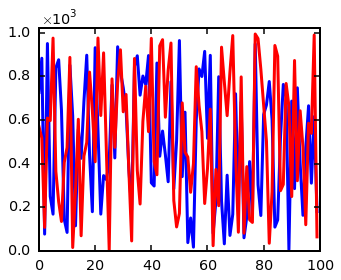

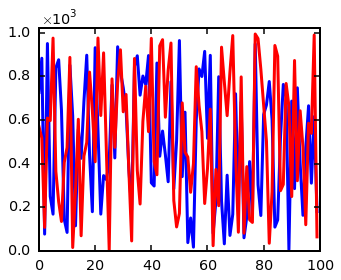

In [53]:
analogData = AnalogData(100)
analogPlot = AnalogPlot(analogData)
print('plotting data...')
for i in range(100):
    analogData.add(np.random.rand(2)*1000)
    analogPlot.update(analogData)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.01)
    #plt.show()

In [ ]:
plt.ioff()
for i in range(3):
    plt.plot()
    plt.draw()
    time.sleep(1)

In [ ]:
ion()   # Active le "mode interactif"
x = np.arange(0,2*3.24,0.01)            
line, = plot(x,np.sin(x))
for i in np.arange(1,200):
    line.set_ydata(np.sin(x+i/10.0))  # Modif. données
    draw()

In [ ]:
axes.update??

In [ ]:
fig, axes = plt.subplots(figsize=(16,9))
for i in range(100):
    axes.scatter(i,i)
    axes.update()
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    time.sleep(0.01)
#
#